<a href="https://colab.research.google.com/github/shuwenericlei/bebi103a-2021/blob/main/BE183_Problem2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bi/Be/Cs 183 2022-2023: Intro to Computational Biology
TAs: Meichen Fang, Tara Chari, Zitong (Jerry) Wang

**Submit your notebooks by sharing a clickable link with Viewer access. Link must be accessible from submitted assignment document.**

Make sure Runtime $\rightarrow$ Restart and run all works without error

**HW 4 Problem 2**

In this problem you will develop code for running the EM algorithm on a small toy example of transcripts, by iteratively estimating the read counts per transcript and approximating the relative transcript abundances from those counts.


##**Import data and install packages**

In [ ]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt #Can use other plotting packages like seaborn

## **Problem 2 (30 points)**
This contains parts b-d of for Problem 2. 

Below you can see an example of the first few steps of the EM procedure with this toy example. This begins with an initial, uniform guess for the Transcript abundances $\alpha$, which is then iteratively updated by running the expecation (E) and maximization (M) steps. We are assuming transcripts of the same length here.

<img src="https://drive.google.com/uc?export=view&id=1C6U4n4hNS7WCPzB8yNdSGb2rovuaf0M4" alt="EMFigure" width="500" height="500">

From the compatibility matrix $\mathbf{Y}$ we can see the alignment of the $N$ Reads to the $K$ Transcripts. For example, Read $c$ does not align to any sequence in Transcript $green$ (the value at Y[1,2] = 0).



In [ ]:
#Compatibility Matrix for the diagram

Y = np.array([[1,0,1,1,1],[1,1,0,0,1],[1, 1, 1 ,0 ,0]])

YLabeled = pd.DataFrame(Y, index=['red','green','blue'], columns=['a','b','c','d','e'])

print(Y)
print(YLabeled)

[[1 0 1 1 1]
 [1 1 0 0 1]
 [1 1 1 0 0]]
       a  b  c  d  e
red    1  0  1  1  1
green  1  1  0  0  1
blue   1  1  1  0  0


Let $\alpha$ represent transcript abundance estimates ($\alpha_{red}, \alpha_{blue}, \alpha_{green} $), start at all $\alpha = 0.33$ (all transcripts equally represented/counted). 

The Q function for optimization is $\sum_{n=1}^N \sum_{k=1}^K \frac{ y_{k,n} \alpha^{(t)}_{k} }{ \sum_{l=1}^K  y_{ln} \alpha^{(t)}_{l}} \log ( y_{k,n} \alpha_{k})$.

### **b) Implement the expectation (E) step as a function (5 points)**

In the E step we will calculate the posterior \begin{align}
p(Z_n=k|Y_n;\alpha^{(t)}) = \frac{  y_{k,n} \alpha^{(t)}_{k}}{ \sum_{l=1}^K y_{l,n} \alpha^{(t)}_{l}}\end{align}
for each pair of the $n$ reads and $k$ transcripts given a set of transcript abundances $\alpha$.




**Fill in the e_step() function below to accept a given vector of transcript abundances ($\alpha^{(t)}$) and the compatibility matrix, and return the values of the posterior.**

In [ ]:
#Implement expectation step as function given transcript abundance estimate alpha and the compatibility matrix
def e_step(alpha, Y):
  # alpha is 1d array
  posterior = Y*alpha[:,None]/np.sum(Y*alpha[:,None],axis=0)
  return posterior

### **c) Implement the maximization (M) step as a function (5 points)**

During the maximization step we re-calculate the values for $\alpha$, given the posterior values and the previously determined $\alpha^{(t)}$ values. The formula for the new $\alpha$ values which maximize the $Q$ function is
\begin{align}
 \alpha_k^{(t+1)}= \frac{1}{N}\sum_{n=1}^N  \frac{ y_{k,n} \alpha^{(t)}_{k}}{\sum_{l=1}^K  y_{l,n} \alpha^{(t)}_{l}} \quad.
\end{align}

**Fill in the m_step() function below to accept the posterior values and to return a vector of updated abundance estimates $\alpha$ for each transcript.**

In [ ]:
#Implement maximization step as function taking in Read counts for each transcript
def m_step(posterior):
  alpha = np.mean(posterior,axis=1)
  return alpha

### **d) Run the EM algorithm to produce estimated abundaces for $\alpha_{red}, \alpha_{blue}, \alpha_{green}$ and plot the log likelihood at each iteration. (10 points)**

Begin with $\alpha_{red} = \alpha_{blue} = \alpha_{green} = 0.33$, successively call the E then M functions until the $\alpha$ values from the current M step are within .0001 of the previous M step estimates.

**Implement the EM algorithm as described and (1) report the final $\alpha$ abundance values and (2) plot the log likelihood (not the Q-function) at each iteration.**

In [ ]:
#Call both until < .0001 difference in estimated abundances

In [ ]:
#(log likelihood= α_red + α_blue)(α_red + α_green)(α_blue + α_green)α_red
def log_likelihood(alpha):
  red, green, blue = alpha
  return np.log((red + blue)*(red + green)*(blue + green)*red)


In [ ]:
def EM(Y, alpha0, tolerance=0.0001):
  diff=1
  alpha_old=alpha0
  ll=[]
  while diff>tolerance:
    posterior=e_step(alpha_old, Y)
    alpha_new=m_step(posterior)
    diff=np.max(np.abs(alpha_old-alpha_new))
    alpha_old=alpha_new
    ll.append(log_likelihood(alpha_new)) 

  return alpha_old,ll

In [ ]:
alpha, ll = EM(Y, np.array([1/3,1/3,1/3]), tolerance=0.0001)

**(1) the final  𝛼  abundance values**

In [ ]:
alpha

array([0.64029637, 0.17985181, 0.17985181])

**(2) plot the log likelihood**

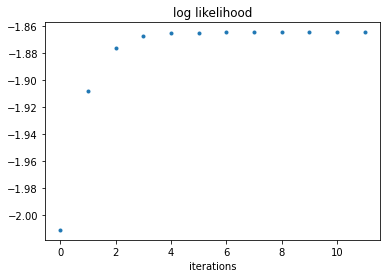

In [ ]:
plt.plot(ll,'.')
plt.title("log likelihood")
plt.xlabel("iterations")
plt.show()

### **e) Comment on the behavior of the likelihood plot i.e. monotonicity, plateaus, etc, and if it is expected behavior. (5 points)**

As expected, the likelihood increases monotonicity and then reaches a plateau.